# Team 1 - Final Report
---

## Introduction 
---

Our goal for this assignment was to analyze three different datasets and come up with metrics to determine the best neighboorhood in Pittsburgh.

Raied chose the dataset containing data on all the trees in the neighborhoods of Pittsburgh. With this dataset, he was able to analyze the quality of the trees in each neighborhood and the values of the various benefits the trees provide in each neighborhood.

## The Metrics
---

## City of Pittsburgh Trees 

In [1]:
# load pandas 
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 12})

# load the tree data directly from the WPRDC and parse directly
trees = pd.read_csv("https://data.wprdc.org/datastore/dump/1515a93c-73e3-4425-9b35-1cd11b2196da",
                           index_col="id", dtype="string") 
# Drop all the NA values
trees["condition"].dropna()
trees["height"].dropna()
trees["neighborhood"].dropna()
trees["air_quality_benfits_total_dollar_value"].dropna()
trees["property_value_benefits_dollarvalue"].dropna()
trees["stormwater_benefits_dollar_value"].dropna()

# Get all the different types of trees 
type_trees = trees["common_name"].unique()

print("There are " + str(len(type_trees)) + " different types of tress all over Pittsburgh")

print("\nThe top 10 neighborhoods with the most trees are:")

# Print the top 10 neighborhoods with the most trees
trees["neighborhood"].value_counts().head(10)

There are 235 different types of tress all over Pittsburgh

The top 10 neighborhoods with the most trees are:


Squirrel Hill South          5073
Highland Park                2941
Squirrel Hill North          2083
South Side Flats             1693
Shadyside                    1558
Bloomfield                   1436
East Liberty                 1366
Point Breeze                 1316
Perry North                  1007
Central Business District    1002
Name: neighborhood, dtype: Int64

##### Now we know the top 10 neighborhoods in Pittsburgh with the most trees. We will now analyze the trees in these 10 neighborhoods more closely. 

Number of trees in good condition:  10729
Number of trees in fair condition:  9812
Number of trees in poor condition:  2274
Number of trees in dead condition:  693
Number of trees in critical condition:  703
Number of trees in very good condition:  185
Number of trees in very excellent condition:  46


Text(0.5, 1.0, 'Conditions of Trees in Pittsburgh')

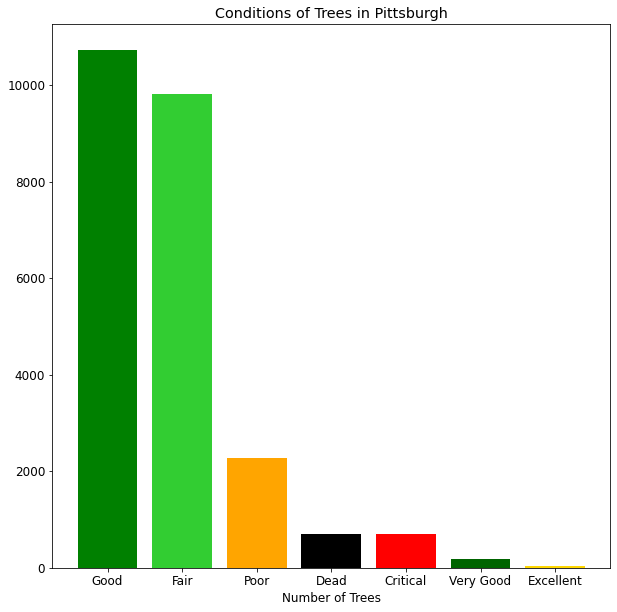

In [2]:
# Get number of total trees in each condition
# Filter out trees that have not grown yet (recently planted) - these trees are however accounted for 
# to determine the neighborhoods with the most trees due to future growth

t = trees.query('condition.str.contains("Good") and not height.str.contains("0") and not height.str.contains("None")')
tr = t.value_counts().size
print("Number of trees in good condition: ", tr)

t = trees.query('condition.str.contains("Fair") and not height.str.contains("0") and not height.str.contains("None")')
tr = t.value_counts().size
print("Number of trees in fair condition: ", tr)

t = trees.query('condition.str.contains("Poor") and not height.str.contains("0") and not height.str.contains("None")')
tr = t.value_counts().size
print("Number of trees in poor condition: ", tr)

t = trees.query('condition.str.contains("Dead") and not height.str.contains("0") and not height.str.contains("None")')
tr = t.value_counts().size
print("Number of trees in dead condition: ", tr)

t = trees.query('condition.str.contains("Critical") and not height.str.contains("0") and not height.str.contains("None")')
tr = t.value_counts().size
print("Number of trees in critical condition: ", tr)

t = trees.query('condition.str.contains("Very Good") and not height.str.contains("0") and not height.str.contains("None")')
tr = t.value_counts().size
print("Number of trees in very good condition: ", tr)

t = trees.query('condition.str.contains("Excellent") and not height.str.contains("0") and not height.str.contains("None")')
tr = t.value_counts().size
print("Number of trees in very excellent condition: ", tr)

# Create a bar graph for the condition of all the trees in Pittsburgh
count = [10729, 9812, 2274, 693, 703, 185, 46]
condition = ('Good','Fair','Poor', 'Dead', 'Critical', 'Very Good', 'Excellent')
plt.figure(figsize=(10,10))
plt.bar(condition, count, color=['green', 'limegreen', 'orange', 'black', 'red', 'darkgreen','gold'])
plt.xlabel("Condition")
plt.xlabel("Number of Trees")
plt.title("Conditions of Trees in Pittsburgh")

This is a bar graph representing the conditions of all the trees in Pittsburgh. The condition of the vast majority of trees in Pittsburgh neighborhoods is either good or fair. 

Now, let's look at the good/fair trees in each of the top 10 neighborhoods

In [3]:
# Squirrel Hill South  

# Use query masks to get number of trees in each condition and the total number
shs_gf = trees.query('neighborhood.str.contains("Squirrel Hill South") and condition.str.contains("Good") and not height.str.contains("0") and not height.str.contains("None")')
shs_good = shs_gf.value_counts().size
print("Number of trees in good condition: ", shs_good)

shs_gf = trees.query('neighborhood.str.contains("Squirrel Hill South") and condition.str.contains("Fair") and not height.str.contains("0") and not height.str.contains("None")')
shs_fair = shs_gf.value_counts().size
print("Number of trees in fair condition: ", shs_fair)

shs_gf = trees.query('neighborhood.str.contains("Squirrel Hill South") and condition.str.contains("Poor") and not height.str.contains("0") and not height.str.contains("None")')
shs_poor = shs_gf.value_counts().size
print("Number of trees in poor condition: ", shs_poor)

shs_gf = trees.query('neighborhood.str.contains("Squirrel Hill South") and condition.str.contains("Dead") and not height.str.contains("0") and not height.str.contains("None")')
shs_dead = shs_gf.value_counts().size
print("Number of trees in dead condition: ", shs_dead)

shs_gf = trees.query('neighborhood.str.contains("Squirrel Hill South") and condition.str.contains("Critical") and not height.str.contains("0") and not height.str.contains("None")')
shs_cri = shs_gf.value_counts().size
print("Number of trees in cirtical condition: ", shs_cri)

shs_gf = trees.query('neighborhood.str.contains("Squirrel Hill South") and condition.str.contains("Very Good") and not height.str.contains("0") and not height.str.contains("None")')
shs_vg = shs_gf.value_counts().size
print("Number of trees in very good condition: ", shs_vg)
      
shs_gf = trees.query('neighborhood.str.contains("Squirrel Hill South") and condition.str.contains("Excellent") and not height.str.contains("0") and not height.str.contains("None")')
shs_exc = shs_gf.value_counts().size
print("Number of trees in excellent condition: ", shs_exc)

shs_total = shs_good + shs_fair + shs_poor + shs_dead + shs_cri + shs_vg + shs_exc
print("Total number of trees: ",shs_total)


Number of trees in good condition:  1053
Number of trees in fair condition:  634
Number of trees in poor condition:  153
Number of trees in dead condition:  15
Number of trees in cirtical condition:  32
Number of trees in very good condition:  24
Number of trees in excellent condition:  2
Total number of trees:  1913


In [4]:
# Highland Park    

# Use query masks to get number of trees in each condition and the total number
hp_gf = trees.query('neighborhood.str.contains("Highland Park") and condition.str.contains("Good") and not height.str.contains("0") and not height.str.contains("None")')
hp_good = hp_gf.value_counts().size
print("Number of trees in good condition: ", hp_good)

hp_gf = trees.query('neighborhood.str.contains("Highland Park") and condition.str.contains("Fair") and not height.str.contains("0") and not height.str.contains("None")')
hp_fair = hp_gf.value_counts().size
print("Number of trees in fair condition: ", hp_fair)

hp_gf = trees.query('neighborhood.str.contains("Highland Park") and condition.str.contains("Poor") and not height.str.contains("0") and not height.str.contains("None")')
hp_poor = hp_gf.value_counts().size
print("Number of trees in poor condition: ", hp_poor)

hp_gf = trees.query('neighborhood.str.contains("Highland Park") and condition.str.contains("Dead") and not height.str.contains("0") and not height.str.contains("None")')
hp_dead = hp_gf.value_counts().size
print("Number of trees in dead condition: ", hp_dead)

hp_gf = trees.query('neighborhood.str.contains("Highland Park") and condition.str.contains("Critical") and not height.str.contains("0") and not height.str.contains("None")')
hp_cri = hp_gf.value_counts().size
print("Number of trees in cirtical condition: ", hp_cri)

hp_gf = trees.query('neighborhood.str.contains("Highland Park") and condition.str.contains("Very Good") and not height.str.contains("0") and not height.str.contains("None")')
hp_vg = hp_gf.value_counts().size
print("Number of trees in very good condition: ", hp_vg)
      
hp_gf = trees.query('neighborhood.str.contains("Highland Park") and condition.str.contains("Excellent") and not height.str.contains("0") and not height.str.contains("None")')
hp_exc = hp_gf.value_counts().size
print("Number of trees in excellent condition: ", hp_exc)

hp_total = hp_good + hp_fair + hp_poor + hp_dead + hp_cri + hp_vg + hp_exc
print("Total number of trees: ",hp_total)


Number of trees in good condition:  389
Number of trees in fair condition:  292
Number of trees in poor condition:  47
Number of trees in dead condition:  6
Number of trees in cirtical condition:  8
Number of trees in very good condition:  6
Number of trees in excellent condition:  5
Total number of trees:  753


In [5]:
# Squirrel Hill North

# Use query masks to get number of trees in each condition and the total number
shn_gf = trees.query('neighborhood.str.contains("Squirrel Hill North") and condition.str.contains("Good") and not height.str.contains("0") and not height.str.contains("None")')
shn_good = shn_gf.value_counts().size
print("Number of trees in good condition: ", shn_good)

shn_gf = trees.query('neighborhood.str.contains("Squirrel Hill North") and condition.str.contains("Fair") and not height.str.contains("0") and not height.str.contains("None")')
shn_fair = shn_gf.value_counts().size
print("Number of trees in fair condition: ", shn_fair)

shn_gf = trees.query('neighborhood.str.contains("Squirrel Hill North") and condition.str.contains("Poor") and not height.str.contains("0") and not height.str.contains("None")')
shn_poor = shn_gf.value_counts().size
print("Number of trees in poor condition: ", shn_poor)

shn_gf = trees.query('neighborhood.str.contains("Squirrel Hill North") and condition.str.contains("Dead") and not height.str.contains("0") and not height.str.contains("None")')
shn_dead = shn_gf.value_counts().size
print("Number of trees in dead condition: ", shn_dead)

shn_gf = trees.query('neighborhood.str.contains("Squirrel Hill North") and condition.str.contains("Critical") and not height.str.contains("0") and not height.str.contains("None")')
shn_cri = shn_gf.value_counts().size
print("Number of trees in cirtical condition: ", shn_cri)

shn_gf = trees.query('neighborhood.str.contains("Squirrel Hill North") and condition.str.contains("Very Good") and not height.str.contains("0") and not height.str.contains("None")')
shn_vg = shn_gf.value_counts().size
print("Number of trees in very good condition: ", shn_vg)
      
shn_gf = trees.query('neighborhood.str.contains("Squirrel Hill North") and condition.str.contains("Excellent") and not height.str.contains("0") and not height.str.contains("None")')
shn_exc = shn_gf.value_counts().size
print("Number of trees in excellent condition: ", shn_exc)

shn_total = shn_good + shn_fair + shn_poor + shn_dead + shn_cri + shn_vg + shn_exc
print("Total number of trees: ",shn_total)

Number of trees in good condition:  406
Number of trees in fair condition:  530
Number of trees in poor condition:  71
Number of trees in dead condition:  2
Number of trees in cirtical condition:  5
Number of trees in very good condition:  13
Number of trees in excellent condition:  1
Total number of trees:  1028


In [6]:
# South Side Flats 

# Use query masks to get number of trees in each condition and the total number
ssf_gf = trees.query('neighborhood.str.contains("South Side Flats") and condition.str.contains("Good") and not height.str.contains("0") and not height.str.contains("None")')
ssf_good = hp_gf.value_counts().size
print("Number of trees in good condition: ", ssf_good)

ssf_gf = trees.query('neighborhood.str.contains("South Side Flats") and condition.str.contains("Fair") and not height.str.contains("0") and not height.str.contains("None")')
ssf_fair = ssf_gf.value_counts().size
print("Number of trees in fair condition: ", ssf_fair)

ssf_gf = trees.query('neighborhood.str.contains("South Side Flats") and condition.str.contains("Poor") and not height.str.contains("0") and not height.str.contains("None")')
ssf_poor = ssf_gf.value_counts().size
print("Number of trees in poor condition: ", ssf_poor)

ssf_gf = trees.query('neighborhood.str.contains("South Side Flats") and condition.str.contains("Dead") and not height.str.contains("0") and not height.str.contains("None")')
ssf_dead = ssf_gf.value_counts().size
print("Number of trees in dead condition: ", ssf_dead)

ssf_gf = trees.query('neighborhood.str.contains("South Side Flats") and condition.str.contains("Critical") and not height.str.contains("0") and not height.str.contains("None")')
ssf_cri = ssf_gf.value_counts().size
print("Number of trees in cirtical condition: ", ssf_cri)

ssf_gf = trees.query('neighborhood.str.contains("South Side Flats") and condition.str.contains("Very Good") and not height.str.contains("0") and not height.str.contains("None")')
ssf_vg = ssf_gf.value_counts().size
print("Number of trees in very good condition: ", ssf_vg)
      
ssf_gf = trees.query('neighborhood.str.contains("South Side Flats") and condition.str.contains("Excellent") and not height.str.contains("0") and not height.str.contains("None")')
ssf_exc = ssf_gf.value_counts().size
print("Number of trees in excellent condition: ", ssf_exc)

ssf_total = ssf_good + ssf_fair + ssf_poor + ssf_dead + ssf_cri + ssf_vg + ssf_exc
print("Total number of trees: ",ssf_total)

Number of trees in good condition:  5
Number of trees in fair condition:  317
Number of trees in poor condition:  65
Number of trees in dead condition:  21
Number of trees in cirtical condition:  28
Number of trees in very good condition:  1
Number of trees in excellent condition:  4
Total number of trees:  441


In [7]:
# Shadyside 

# Use query masks to get number of trees in each condition and the total number
ss_gf = trees.query('neighborhood.str.contains("Shadyside") and condition.str.contains("Good") and not height.str.contains("0") and not height.str.contains("None")')
ss_good = hp_gf.value_counts().size
print("Number of trees in good condition: ", ss_good)

ss_gf = trees.query('neighborhood.str.contains("Shadyside") and condition.str.contains("Fair") and not height.str.contains("0") and not height.str.contains("None")')
ss_fair = ss_gf.value_counts().size
print("Number of trees in fair condition: ", ss_fair)

ss_gf = trees.query('neighborhood.str.contains("Shadyside") and condition.str.contains("Poor") and not height.str.contains("0") and not height.str.contains("None")')
ss_poor = ss_gf.value_counts().size
print("Number of trees in poor condition: ", ss_poor)

ss_gf = trees.query('neighborhood.str.contains("Shadyside") and condition.str.contains("Dead") and not height.str.contains("0") and not height.str.contains("None")')
ss_dead = ss_gf.value_counts().size
print("Number of trees in dead condition: ", ss_dead)

ss_gf = trees.query('neighborhood.str.contains("Shadyside") and condition.str.contains("Critical") and not height.str.contains("0") and not height.str.contains("None")')
ss_cri = ss_gf.value_counts().size
print("Number of trees in cirtical condition: ", ss_cri)

ss_gf = trees.query('neighborhood.str.contains("Shadyside") and condition.str.contains("Very Good") and not height.str.contains("0") and not height.str.contains("None")')
ss_vg = ss_gf.value_counts().size
print("Number of trees in very good condition: ", ss_vg)
      
ss_gf = trees.query('neighborhood.str.contains("Shadyside") and condition.str.contains("Excellent") and not height.str.contains("0") and not height.str.contains("None")')
ss_exc = ss_gf.value_counts().size
print("Number of trees in excellent condition: ", ss_exc)

ss_total = ss_good + ss_fair + ss_poor + ss_dead + ss_cri + ss_vg + ss_exc
print("Total number of trees: ",ss_total)

Number of trees in good condition:  5
Number of trees in fair condition:  472
Number of trees in poor condition:  133
Number of trees in dead condition:  14
Number of trees in cirtical condition:  24
Number of trees in very good condition:  2
Number of trees in excellent condition:  4
Total number of trees:  654


In [8]:
# Bloomfield

# Use query masks to get number of trees in each condition and the total number
bf_gf = trees.query('neighborhood.str.contains("Bloomfield") and condition.str.contains("Good") and not height.str.contains("0") and not height.str.contains("None")')
bf_good = hp_gf.value_counts().size
print("Number of trees in good condition: ", bf_good)

bf_gf = trees.query('neighborhood.str.contains("Bloomfield") and condition.str.contains("Fair") and not height.str.contains("0") and not height.str.contains("None")')
bf_fair = bf_gf.value_counts().size
print("Number of trees in fair condition: ", bf_fair)

bf_gf = trees.query('neighborhood.str.contains("Bloomfield") and condition.str.contains("Poor") and not height.str.contains("0") and not height.str.contains("None")')
bf_poor = bf_gf.value_counts().size
print("Number of trees in poor condition: ", bf_poor)

bf_gf = trees.query('neighborhood.str.contains("Bloomfield") and condition.str.contains("Dead") and not height.str.contains("0") and not height.str.contains("None")')
bf_dead = bf_gf.value_counts().size
print("Number of trees in dead condition: ", bf_dead)

bf_gf = trees.query('neighborhood.str.contains("Bloomfield") and condition.str.contains("Critical") and not height.str.contains("0") and not height.str.contains("None")')
bf_cri = bf_gf.value_counts().size
print("Number of trees in cirtical condition: ", bf_cri)

bf_gf = trees.query('neighborhood.str.contains("Bloomfield") and condition.str.contains("Very Good") and not height.str.contains("0") and not height.str.contains("None")')
bf_vg = bf_gf.value_counts().size
print("Number of trees in very good condition: ", bf_vg)
      
bf_gf = trees.query('neighborhood.str.contains("Bloomfield") and condition.str.contains("Excellent") and not height.str.contains("0") and not height.str.contains("None")')
bf_exc = bf_gf.value_counts().size
print("Number of trees in excellent condition: ", bf_exc)

bf_total = bf_good + bf_fair + bf_poor + bf_dead + bf_cri + bf_vg + bf_exc
print("Total number of trees: ",bf_total)

Number of trees in good condition:  5
Number of trees in fair condition:  273
Number of trees in poor condition:  81
Number of trees in dead condition:  17
Number of trees in cirtical condition:  16
Number of trees in very good condition:  3
Number of trees in excellent condition:  1
Total number of trees:  396


In [9]:
# East Liberty 

# Use query masks to get number of trees in each condition and the total number
el_gf = trees.query('neighborhood.str.contains("East Liberty") and condition.str.contains("Good") and not height.str.contains("0") and not height.str.contains("None")')
el_good = hp_gf.value_counts().size
print("Number of trees in good condition: ", el_good)

el_gf = trees.query('neighborhood.str.contains("East Liberty") and condition.str.contains("Fair") and not height.str.contains("0") and not height.str.contains("None")')
el_fair = el_gf.value_counts().size
print("Number of trees in fair condition: ", el_fair)

el_gf = trees.query('neighborhood.str.contains("East Liberty") and condition.str.contains("Poor") and not height.str.contains("0") and not height.str.contains("None")')
el_poor = el_gf.value_counts().size
print("Number of trees in poor condition: ", el_poor)

el_gf = trees.query('neighborhood.str.contains("East Liberty") and condition.str.contains("Dead") and not height.str.contains("0") and not height.str.contains("None")')
el_dead = el_gf.value_counts().size
print("Number of trees in dead condition: ", el_dead)

el_gf = trees.query('neighborhood.str.contains("East Liberty") and condition.str.contains("Critical") and not height.str.contains("0") and not height.str.contains("None")')
el_cri = el_gf.value_counts().size
print("Number of trees in cirtical condition: ", el_cri)

el_gf = trees.query('neighborhood.str.contains("East Liberty") and condition.str.contains("Very Good") and not height.str.contains("0") and not height.str.contains("None")')
el_vg = el_gf.value_counts().size
print("Number of trees in very good condition: ", el_vg)
      
el_gf = trees.query('neighborhood.str.contains("East Liberty") and condition.str.contains("Excellent") and not height.str.contains("0") and not height.str.contains("None")')
el_exc = el_gf.value_counts().size
print("Number of trees in excellent condition: ", el_exc)

el_total = el_good + el_fair + el_poor + el_dead + el_cri + el_vg + el_exc
print("Total number of trees: ",el_total)

Number of trees in good condition:  5
Number of trees in fair condition:  491
Number of trees in poor condition:  104
Number of trees in dead condition:  14
Number of trees in cirtical condition:  37
Number of trees in very good condition:  10
Number of trees in excellent condition:  0
Total number of trees:  661


In [10]:
# Point Breeze

# Use query masks to get number of trees in each condition and the total number
pb_gf = trees.query('neighborhood.str.contains("Point Breeze") and condition.str.contains("Good") and not height.str.contains("0") and not height.str.contains("None")')
pb_good = hp_gf.value_counts().size
print("Number of trees in good condition: ", pb_good)

pb_gf = trees.query('neighborhood.str.contains("Point Breeze") and condition.str.contains("Fair") and not height.str.contains("0") and not height.str.contains("None")')
pb_fair = pb_gf.value_counts().size
print("Number of trees in fair condition: ", pb_fair)

pb_gf = trees.query('neighborhood.str.contains("Point Breeze") and condition.str.contains("Poor") and not height.str.contains("0") and not height.str.contains("None")')
pb_poor = pb_gf.value_counts().size
print("Number of trees in poor condition: ", pb_poor)

pb_gf = trees.query('neighborhood.str.contains("Point Breeze") and condition.str.contains("Dead") and not height.str.contains("0") and not height.str.contains("None")')
pb_dead = pb_gf.value_counts().size
print("Number of trees in dead condition: ", pb_dead)

pb_gf = trees.query('neighborhood.str.contains("Point Breeze") and condition.str.contains("Critical") and not height.str.contains("0") and not height.str.contains("None")')
pb_cri = pb_gf.value_counts().size
print("Number of trees in cirtical condition: ", pb_cri)

pb_gf = trees.query('neighborhood.str.contains("Point Breeze") and condition.str.contains("Very Good") and not height.str.contains("0") and not height.str.contains("None")')
pb_vg = pb_gf.value_counts().size
print("Number of trees in very good condition: ", pb_vg)
      
pb_gf = trees.query('neighborhood.str.contains("Point Breeze") and condition.str.contains("Excellent") and not height.str.contains("0") and not height.str.contains("None")')
pb_exc = pb_gf.value_counts().size
print("Number of trees in excellent condition: ", pb_exc)

pb_total = pb_good + pb_fair + pb_poor + pb_dead + pb_cri + pb_vg + pb_exc
print("Total number of trees: ",pb_total)

Number of trees in good condition:  5
Number of trees in fair condition:  565
Number of trees in poor condition:  101
Number of trees in dead condition:  13
Number of trees in cirtical condition:  13
Number of trees in very good condition:  7
Number of trees in excellent condition:  1
Total number of trees:  705


In [11]:
# Perry North

# Use query masks to get number of trees in each condition and the total number
pn_gf = trees.query('neighborhood.str.contains("Perry North") and condition.str.contains("Good") and not height.str.contains("0") and not height.str.contains("None")')
pn_good = hp_gf.value_counts().size
print("Number of trees in good condition: ", pn_good)

pn_gf = trees.query('neighborhood.str.contains("Perry North") and condition.str.contains("Fair") and not height.str.contains("0") and not height.str.contains("None")')
pn_fair = pn_gf.value_counts().size
print("Number of trees in fair condition: ", pn_fair)

pn_gf = trees.query('neighborhood.str.contains("Perry North") and condition.str.contains("Poor") and not height.str.contains("0") and not height.str.contains("None")')
pn_poor = pn_gf.value_counts().size
print("Number of trees in poor condition: ", pn_poor)

pn_gf = trees.query('neighborhood.str.contains("Perry North") and condition.str.contains("Dead") and not height.str.contains("0") and not height.str.contains("None")')
pn_dead = pn_gf.value_counts().size
print("Number of trees in dead condition: ", pn_dead)

pn_gf = trees.query('neighborhood.str.contains("Perry North") and condition.str.contains("Critical") and not height.str.contains("0") and not height.str.contains("None")')
pn_cri = pn_gf.value_counts().size
print("Number of trees in cirtical condition: ", pn_cri)

pn_gf = trees.query('neighborhood.str.contains("Perry North") and condition.str.contains("Very Good") and not height.str.contains("0") and not height.str.contains("None")')
pn_vg = pn_gf.value_counts().size
print("Number of trees in very good condition: ", pn_vg)
      
pn_gf = trees.query('neighborhood.str.contains("Perry North") and condition.str.contains("Excellent") and not height.str.contains("0") and not height.str.contains("None")')
pn_exc = pn_gf.value_counts().size
print("Number of trees in excellent condition: ", pn_exc)

pn_total = pn_good + pn_fair + pn_poor + pn_dead + pn_cri + pn_vg + pn_exc
print("Total number of trees: ",pn_total)

Number of trees in good condition:  5
Number of trees in fair condition:  201
Number of trees in poor condition:  20
Number of trees in dead condition:  18
Number of trees in cirtical condition:  8
Number of trees in very good condition:  0
Number of trees in excellent condition:  0
Total number of trees:  252


In [12]:
# Central Business District

# Use query masks to get number of trees in each condition and the total number
cbd_gf = trees.query('neighborhood.str.contains("Central Business District") and condition.str.contains("Good") and not height.str.contains("0") and not height.str.contains("None")')
cbd_good = hp_gf.value_counts().size
print("Number of trees in good condition: ", cbd_good)

cbd_gf = trees.query('neighborhood.str.contains("Central Business District") and condition.str.contains("Fair") and not height.str.contains("0") and not height.str.contains("None")')
cbd_fair = cbd_gf.value_counts().size
print("Number of trees in fair condition: ", cbd_fair)

cbd_gf = trees.query('neighborhood.str.contains("Central Business District") and condition.str.contains("Poor") and not height.str.contains("0") and not height.str.contains("None")')
cbd_poor = cbd_gf.value_counts().size
print("Number of trees in poor condition: ", cbd_poor)

cbd_gf = trees.query('neighborhood.str.contains("Central Business District") and condition.str.contains("Dead") and not height.str.contains("0") and not height.str.contains("None")')
cbd_dead = cbd_gf.value_counts().size
print("Number of trees in dead condition: ", cbd_dead)

cbd_gf = trees.query('neighborhood.str.contains("Central Business District") and condition.str.contains("Critical") and not height.str.contains("0") and not height.str.contains("None")')
cbd_cri = cbd_gf.value_counts().size
print("Number of trees in cirtical condition: ", cbd_cri)

cbd_gf = trees.query('neighborhood.str.contains("Central Business District") and condition.str.contains("Very Good") and not height.str.contains("0") and not height.str.contains("None")')
cbd_vg = cbd_gf.value_counts().size
print("Number of trees in very good condition: ", cbd_vg)
      
cbd_gf = trees.query('neighborhood.str.contains("Central Business District") and condition.str.contains("Excellent") and not height.str.contains("0") and not height.str.contains("None")')
cbd_exc = cbd_gf.value_counts().size
print("Number of trees in excellent condition: ", cbd_exc)

cbd_total = cbd_good + cbd_fair + cbd_poor + cbd_dead + cbd_cri + cbd_vg + cbd_exc
print("Total number of trees: ",cbd_total)

Number of trees in good condition:  5
Number of trees in fair condition:  262
Number of trees in poor condition:  31
Number of trees in dead condition:  66
Number of trees in cirtical condition:  39
Number of trees in very good condition:  1
Number of trees in excellent condition:  0
Total number of trees:  404


<AxesSubplot:title={'center':'Good and Fair Trees in Top 10 Neighborhoods'}, xlabel='Neighborhood', ylabel='Number of Trees'>

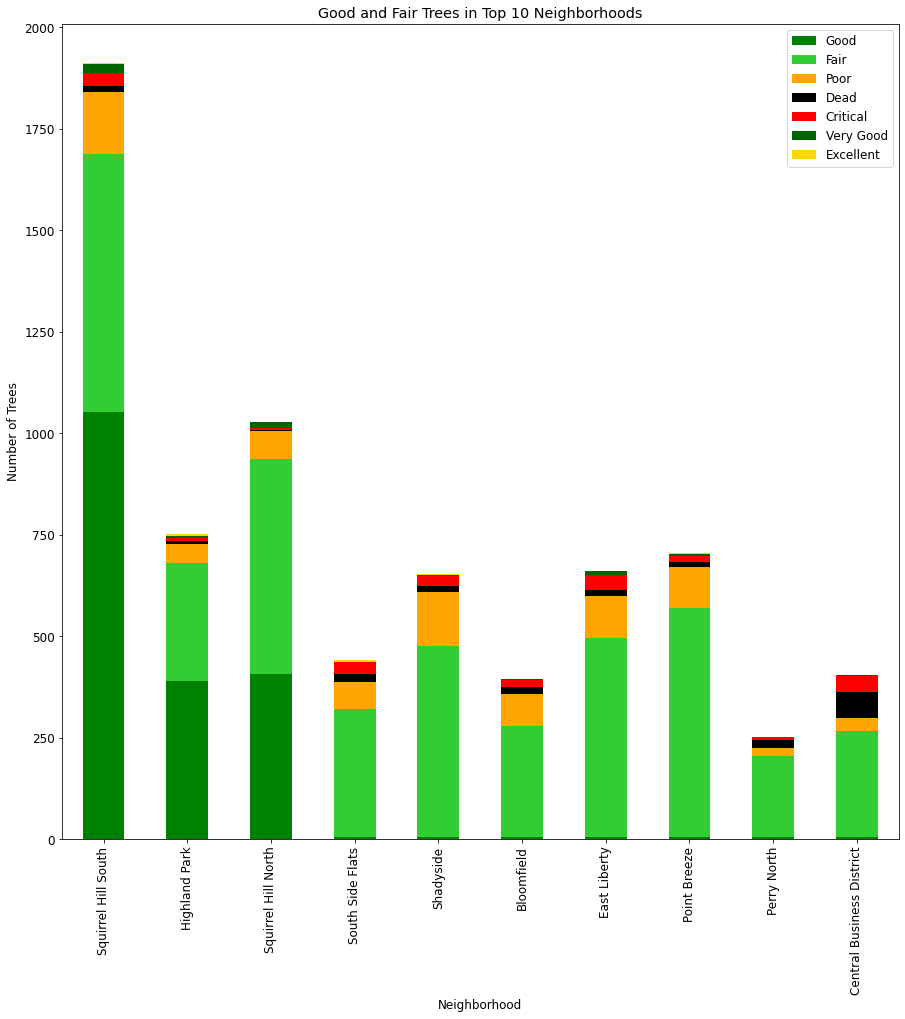

In [13]:
# Categorize the data from above to create a bar chart
df2 = pd.DataFrame([(shs_good, shs_fair, shs_poor, shs_dead, shs_cri, shs_vg, shs_exc), 
                    (hp_good, hp_fair, hp_poor, hp_dead, hp_cri, hp_vg, hp_exc), 
                    (shn_good, shn_fair, shn_poor, shn_dead, shn_cri, shn_vg, shn_exc), 
                    (ssf_good, ssf_fair, ssf_poor, ssf_dead, ssf_cri, ssf_vg, ssf_exc),
                    (ss_good, ss_fair, ss_poor, ss_dead, ss_cri, ss_vg, ss_exc), 
                    (bf_good, bf_fair, bf_poor, bf_dead, bf_cri, bf_vg, bf_exc),
                    (el_good, el_fair, el_poor, el_dead, el_cri, el_vg, el_exc), 
                    (pb_good, pb_fair, pb_poor, pb_dead, pb_cri, pb_vg, pb_exc), 
                    (pn_good, pn_fair, pn_poor, pn_dead, pn_cri, pn_vg, pn_exc), 
                    (cbd_good, cbd_fair, cbd_poor, cbd_dead, cbd_cri, cbd_vg, cbd_exc)], 
                   columns=['Good', 'Fair', 'Poor', 'Dead', 'Critical', 'Very Good', 'Excellent'], 
                   index=["Squirrel Hill South","Highland Park","Squirrel Hill North","South Side Flats","Shadyside", "Bloomfield", "East Liberty", "Point Breeze", "Perry North", "Central Business District" ])

# Plot a bar chart
df2.plot(stacked=True, kind="bar", figsize=(15,15), color=['green', 'limegreen', 'orange', 'black', 'red', 'darkgreen','gold'], xlabel="Neighborhood", ylabel="Number of Trees", title="Good and Fair Trees in Top 10 Neighborhoods")

Looking at this bar graph, we can see how about half of all trees in each neghborhood are either in good or fair condition which means the deciding measure in this comparison is the total number of trees in each neighborhood which ultimately places Squirrel Hill South, Squirrel Hill North, and Highland Park as the top 3 best neighborhoods in Pittsburgh.

Since we cannot simply decide the best neighborhood solely on the amount of trees, let's look at the value these trees offer add to each neighborhood. The dataset provides a wide variety of values added by the trees, but the three I will be focusing on are:

    1. Air Quality Benefits (Total Dollar Value)
    2. Property Value Benefits (Dollar Value)
    3. Stormwater Benefits (Dollar Value)
    
Good air quality is crucial to our health, trees on property usually mean a garden/backyard space which is good for privacy and leisure, and since it often rains a lot in Pittsburgh, it's important to take the stormwater benefits into consideration

In [14]:
# Squirrel Hill South  

# Use query masks to select the neighborhood and convert the air quality column's data to float
shs_benefits = trees.query('neighborhood.str.contains("Squirrel Hill South")')
shs_aq = shs_benefits['air_quality_benfits_total_dollar_value'].astype(float).mean()
shs_pv = shs_benefits['property_value_benefits_dollarvalue'].astype(float).mean()
shs_swb = shs_benefits['stormwater_benefits_dollar_value'].astype(float).mean()

# Print the results as formatted currency
print("The average dollar value of the air quality benefits provided by the trees in this neighborhood is:", "${:,.2f}".format(round(shs_aq,2)))
print("The average dollar value of the property value provided by the trees in this neighborhood is:", "${:,.2f}".format(round(shs_pv,2)))
print("The average dollar value of the storm water benefits provided by the trees in this neighborhood is:", "${:,.2f}".format(round(shs_swb,2)))

The average dollar value of the air quality benefits provided by the trees in this neighborhood is: $9.48
The average dollar value of the property value provided by the trees in this neighborhood is: $58.54
The average dollar value of the storm water benefits provided by the trees in this neighborhood is: $13.38


In [15]:
# Highland Park

# Use query masks to select the neighborhood and convert the air quality column's data to float
hp_benefits = trees.query('neighborhood.str.contains("Highland Park")')
hp_aq = hp_benefits['air_quality_benfits_total_dollar_value'].astype(float).mean()
hp_pv = hp_benefits['property_value_benefits_dollarvalue'].astype(float).mean()
hp_swb = hp_benefits['stormwater_benefits_dollar_value'].astype(float).mean()

# Print the results as formatted currency
print("The average dollar value of the air quality benefits provided by the trees in this neighborhood is:", "${:,.2f}".format(round(hp_aq,2)))
print("The average dollar value of the property value provided by the trees in this neighborhood is:", "${:,.2f}".format(round(hp_pv,2)))
print("The average dollar value of the storm water benefits provided by the trees in this neighborhood is:", "${:,.2f}".format(round(hp_swb,2)))

The average dollar value of the air quality benefits provided by the trees in this neighborhood is: $10.16
The average dollar value of the property value provided by the trees in this neighborhood is: $59.52
The average dollar value of the storm water benefits provided by the trees in this neighborhood is: $14.26


In [16]:
# Squirrel Hill North

# Use query masks to select the neighborhood and convert the air quality column's data to float
shn_benefits = trees.query('neighborhood.str.contains("Squirrel Hill North")')
shn_aq = shn_benefits['air_quality_benfits_total_dollar_value'].astype(float).mean()
shn_pv = shn_benefits['property_value_benefits_dollarvalue'].astype(float).mean()
shn_swb = shn_benefits['stormwater_benefits_dollar_value'].astype(float).mean()

# Print the results as formatted currency
print("The average dollar value of the air quality benefits provided by the trees in this neighborhood is:", "${:,.2f}".format(round(shn_aq,2)))
print("The average dollar value of the property value provided by the trees in this neighborhood is:", "${:,.2f}".format(round(shn_pv,2)))
print("The average dollar value of the storm water benefits provided by the trees in this neighborhood is:", "${:,.2f}".format(round(shn_swb,2)))

The average dollar value of the air quality benefits provided by the trees in this neighborhood is: $12.41
The average dollar value of the property value provided by the trees in this neighborhood is: $63.29
The average dollar value of the storm water benefits provided by the trees in this neighborhood is: $17.84


In [17]:
# South Side Flats

# Use query masks to select the neighborhood and convert the air quality column's data to float
ssf_benefits = trees.query('neighborhood.str.contains("South Side Flats")')
ssf_aq = ssf_benefits['air_quality_benfits_total_dollar_value'].astype(float).mean()
ssf_pv = ssf_benefits['property_value_benefits_dollarvalue'].astype(float).mean()
ssf_swb = ssf_benefits['stormwater_benefits_dollar_value'].astype(float).mean()

# Print the results as formatted currency
print("The average dollar value of the air quality benefits provided by the trees in this neighborhood is:", "${:,.2f}".format(round(ssf_aq,2)))
print("The average dollar value of the property value provided by the trees in this neighborhood is:", "${:,.2f}".format(round(ssf_pv,2)))
print("The average dollar value of the storm water benefits provided by the trees in this neighborhood is:", "${:,.2f}".format(round(ssf_swb,2)))

The average dollar value of the air quality benefits provided by the trees in this neighborhood is: $3.49
The average dollar value of the property value provided by the trees in this neighborhood is: $45.05
The average dollar value of the storm water benefits provided by the trees in this neighborhood is: $4.05


In [18]:
# Shadyside

# Use query masks to select the neighborhood and convert the air quality column's data to float
ss_benefits = trees.query('neighborhood.str.contains("Shadyside")')
ss_aq = ss_benefits['air_quality_benfits_total_dollar_value'].astype(float).mean()
ss_pv = ss_benefits['property_value_benefits_dollarvalue'].astype(float).mean()
ss_swb = ss_benefits['stormwater_benefits_dollar_value'].astype(float).mean()

# Print the results as formatted currency
print("The average dollar value of the air quality benefits provided by the trees in this neighborhood is:", "${:,.2f}".format(round(ss_aq,2)))
print("The average dollar value of the property value provided by the trees in this neighborhood is:", "${:,.2f}".format(round(ss_pv,2)))
print("The average dollar value of the storm water benefits provided by the trees in this neighborhood is:", "${:,.2f}".format(round(ss_swb,2)))

The average dollar value of the air quality benefits provided by the trees in this neighborhood is: $7.50
The average dollar value of the property value provided by the trees in this neighborhood is: $57.07
The average dollar value of the storm water benefits provided by the trees in this neighborhood is: $10.16


In [19]:
# Bloomfield

# Use query masks to select the neighborhood and convert the air quality column's data to float
bf_benefits = trees.query('neighborhood.str.contains("Bloomfield")')
bf_aq = bf_benefits['air_quality_benfits_total_dollar_value'].astype(float).mean()
bf_pv = bf_benefits['property_value_benefits_dollarvalue'].astype(float).mean()
bf_swb = bf_benefits['stormwater_benefits_dollar_value'].astype(float).mean()

# Print the results as formatted currency
print("The average dollar value of the air quality benefits provided by the trees in this neighborhood is:", "${:,.2f}".format(round(bf_aq,2)))
print("The average dollar value of the property value provided by the trees in this neighborhood is:", "${:,.2f}".format(round(bf_pv,2)))
print("The average dollar value of the storm water benefits provided by the trees in this neighborhood is:", "${:,.2f}".format(round(bf_swb,2)))

The average dollar value of the air quality benefits provided by the trees in this neighborhood is: $5.07
The average dollar value of the property value provided by the trees in this neighborhood is: $49.17
The average dollar value of the storm water benefits provided by the trees in this neighborhood is: $6.38


In [20]:
# East Liberty

# Use query masks to select the neighborhood and convert the air quality column's data to float
el_benefits = trees.query('neighborhood.str.contains("East Liberty")')
el_aq = el_benefits['air_quality_benfits_total_dollar_value'].astype(float).mean()
el_pv = el_benefits['property_value_benefits_dollarvalue'].astype(float).mean()
el_swb = el_benefits['stormwater_benefits_dollar_value'].astype(float).mean()

# Print the results as formatted currency
print("The average dollar value of the air quality benefits provided by the trees in this neighborhood is:", "${:,.2f}".format(round(el_aq,2)))
print("The average dollar value of the property value provided by the trees in this neighborhood is:", "${:,.2f}".format(round(el_pv,2)))
print("The average dollar value of the storm water benefits provided by the trees in this neighborhood is:", "${:,.2f}".format(round(el_swb,2)))

The average dollar value of the air quality benefits provided by the trees in this neighborhood is: $4.08
The average dollar value of the property value provided by the trees in this neighborhood is: $43.09
The average dollar value of the storm water benefits provided by the trees in this neighborhood is: $5.12


In [21]:
# Point Breeze

# Use query masks to select the neighborhood and convert the air quality column's data to float
pb_benefits = trees.query('neighborhood.str.contains("Point Breeze")')
pb_aq = pb_benefits['air_quality_benfits_total_dollar_value'].astype(float).mean()
pb_pv = pb_benefits['property_value_benefits_dollarvalue'].astype(float).mean()
pb_swb = pb_benefits['stormwater_benefits_dollar_value'].astype(float).mean()

# Print the results as formatted currency
print("The average dollar value of the air quality benefits provided by the trees in this neighborhood is:", "${:,.2f}".format(round(pb_aq,2)))
print("The average dollar value of the property value provided by the trees in this neighborhood is:", "${:,.2f}".format(round(pb_pv,2)))
print("The average dollar value of the storm water benefits provided by the trees in this neighborhood is:", "${:,.2f}".format(round(pb_swb,2)))

The average dollar value of the air quality benefits provided by the trees in this neighborhood is: $9.89
The average dollar value of the property value provided by the trees in this neighborhood is: $57.06
The average dollar value of the storm water benefits provided by the trees in this neighborhood is: $13.85


In [22]:
# Perry North

# Use query masks to select the neighborhood and convert the air quality column's data to float
pn_benefits = trees.query('neighborhood.str.contains("Perry North")')
pn_aq = pn_benefits['air_quality_benfits_total_dollar_value'].astype(float).mean()
pn_pv = pn_benefits['property_value_benefits_dollarvalue'].astype(float).mean()
pn_swb = pn_benefits['stormwater_benefits_dollar_value'].astype(float).mean()

# Print the results as formatted currency
print("The average dollar value of the air quality benefits provided by the trees in this neighborhood is:", "${:,.2f}".format(round(pn_aq,2)))
print("The average dollar value of the property value provided by the trees in this neighborhood is:", "${:,.2f}".format(round(pn_pv,2)))
print("The average dollar value of the storm water benefits provided by the trees in this neighborhood is:", "${:,.2f}".format(round(pn_swb,2)))

The average dollar value of the air quality benefits provided by the trees in this neighborhood is: $9.26
The average dollar value of the property value provided by the trees in this neighborhood is: $60.78
The average dollar value of the storm water benefits provided by the trees in this neighborhood is: $13.02


In [23]:
# Central Business District

# Use query masks to select the neighborhood and convert the air quality column's data to float
cbd_benefits = trees.query('neighborhood.str.contains("Central Business District")')
cbd_aq = cbd_benefits['air_quality_benfits_total_dollar_value'].astype(float).mean()
cbd_pv = cbd_benefits['property_value_benefits_dollarvalue'].astype(float).mean()
cbd_swb = cbd_benefits['stormwater_benefits_dollar_value'].astype(float).mean()

# Print the results as formatted currency
print("The average dollar value of the air quality benefits provided by the trees in this neighborhood is:", "${:,.2f}".format(round(cbd_aq,2)))
print("The average dollar value of the property value provided by the trees in this neighborhood is:", "${:,.2f}".format(round(cbd_pv,2)))
print("The average dollar value of the storm water benefits provided by the trees in this neighborhood is:", "${:,.2f}".format(round(cbd_swb,2)))

The average dollar value of the air quality benefits provided by the trees in this neighborhood is: $3.42
The average dollar value of the property value provided by the trees in this neighborhood is: $56.38
The average dollar value of the storm water benefits provided by the trees in this neighborhood is: $3.76


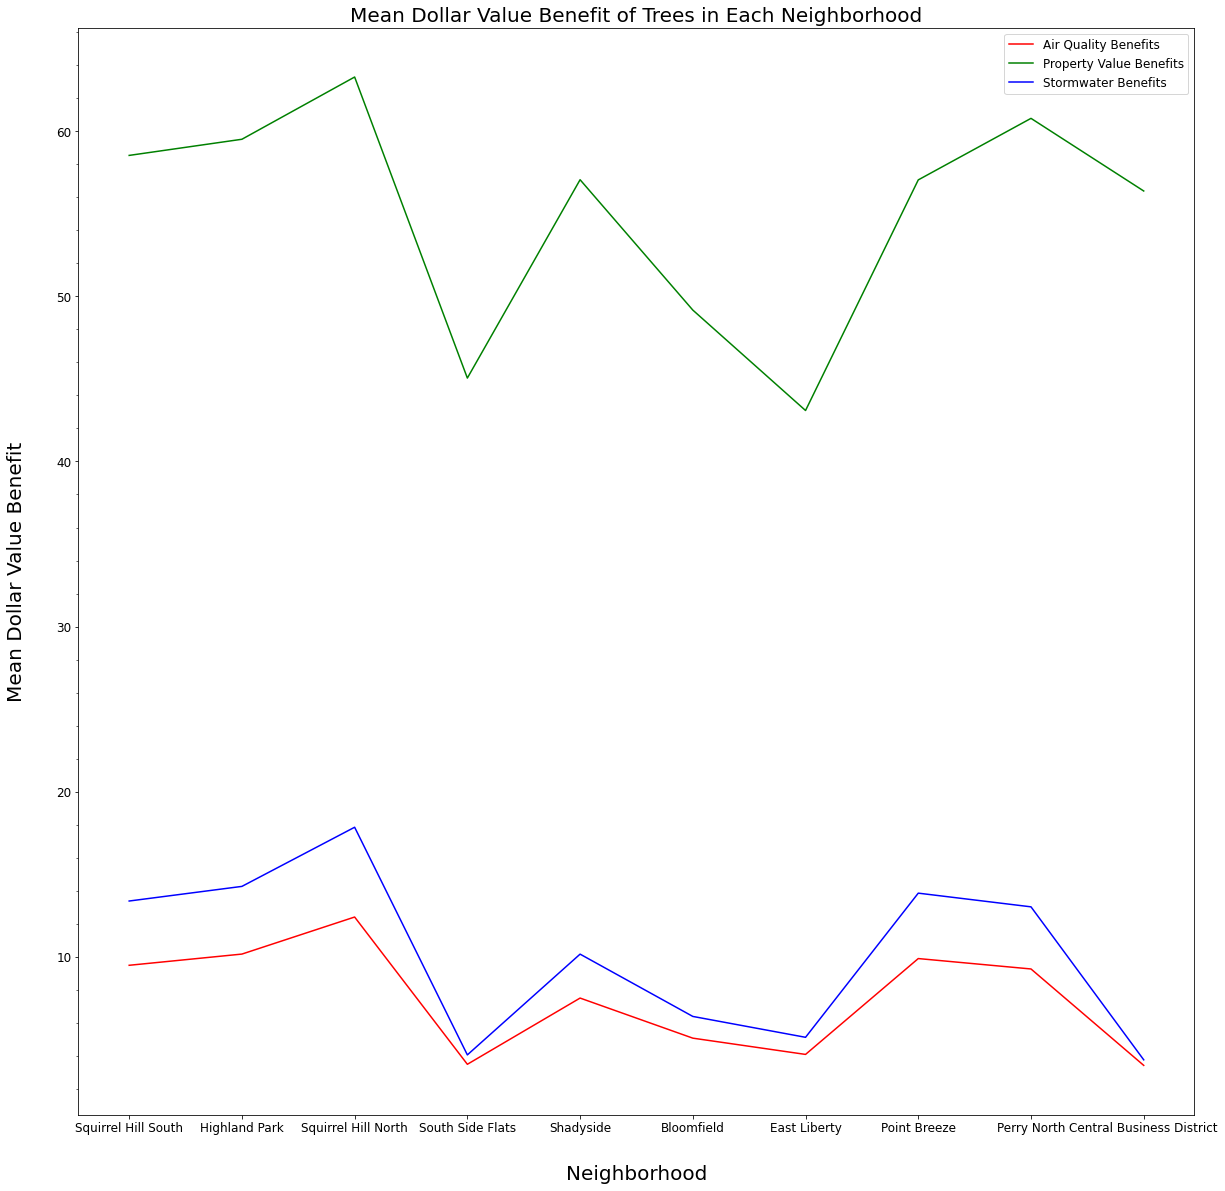

In [24]:
import array as arr

# Create arrays with all the values
air_quality = arr.array('f', [shs_aq, hp_aq, shn_aq, ssf_aq, ss_aq, bf_aq, el_aq, pb_aq, pn_aq, cbd_aq])
property_value = arr.array('f', [shs_pv, hp_pv, shn_pv, ssf_pv, ss_pv, bf_pv, el_pv, pb_pv, pn_pv, cbd_pv])
stormwater_benefits = arr.array('f', [shs_swb, hp_swb, shn_swb, ssf_swb, ss_swb, bf_swb, el_swb, pb_swb, pn_swb, cbd_swb])

# Create the neighborhood array
neighborhoods = "Squirrel Hill South", "Highland Park", "Squirrel Hill North", "South Side Flats", "Shadyside", "Bloomfield", "East Liberty", "Point Breeze", "Perry North", "Central Business District"

# Format the plot and print it
plt.figure(figsize=(20,20))
plt.plot(neighborhoods, air_quality, color='red')
plt.plot(neighborhoods, property_value, color='green')
plt.plot(neighborhoods,stormwater_benefits, color='blue')
plt.xlabel("Neighborhood", fontsize = 20, labelpad = 30)
plt.ylabel("Mean Dollar Value Benefit", fontsize = 20, labelpad = 30)
plt.title("Mean Dollar Value Benefit of Trees in Each Neighborhood", fontsize = 20)
plt.legend(["Air Quality Benefits", "Property Value Benefits", "Stormwater Benefits"])
plt.minorticks_on() 
plt.tick_params(axis='x', which='minor', bottom=False)
plt.show()

From the plot above, we can make the following conclusions:
    
    1. The top 3 neighborhoods whose trees provide the most air quality benefits are:
        1. Squirrel Hill North
        2. Highland Park
        3. Squirrel Hill South
        
    2. The top 3 neighborhoods whose trees provide the most properety value benefits are:
        1. Squirrel Hill North
        2. Perry North
        3. Highland Park
        
    3. The top 3 neighborhoods whose trees provide the most stormwater benefits are:
        1. Squirrel Hill North
        2. Highland Park
        3. Squirrel Hill South

### Raied's Conclusion

Looking at all the data analyze above, I have concluded that Squirrel Hill North is the best neighborhood in Pittsburgh. After Squirrel Hill South, it has the second most number of trees out of all the neighborhoods in Pittsburgh and the vast majority of them are in good or fair condition. What makes Squirrel Hill North the best neighborhood in Pittsburgh because of its trees is the fact that the trees in Squirrel Hill North provide the highest dollar value air quality, porperty value, and stormwater benefits out of the top 10 neighborhoods with the most amount of trees. 

![lorax](https://media.giphy.com/media/JmOH9uFRtmlakwZ2wB/giphy.gif)

## The Best Neighborhood Conclusion
---